In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gathering Data

In [3]:
day_df = pd.read_csv("data/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print(day_df.isna().sum())
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
print(f"Duplicate Data: {day_df.duplicated().sum()}")
day_df.describe()

Duplicate Data: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Date Cleaning

In [7]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [28]:
max_temp = 0.41
exceeds_max_temp = day_df['temp'] > max_temp

In [31]:
day_df.loc[exceeds_max_temp, 'temp'] = max_temp

day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casual_percentage,registered_percentage
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.336041,0.663959
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.163546,0.836454
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.088955,0.911045
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.069142,0.930858
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.051250,0.948750
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,0.054795,0.945205
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,0.098013,0.901987
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,0.070907,0.929093
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,0.065693,0.934307
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,0.031037,0.968963


In [26]:
day_df[day_df['temp'] > 0.41]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casual_percentage,registered_percentage
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913,0.108730,0.891270
47,48,2011-02-17,1,0,2,0,4,1,1,0.435833,0.428658,0.505000,0.230104,259,2216,2475,0.104646,0.895354
48,49,2011-02-18,1,0,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925,579,2348,2927,0.197813,0.802187
75,76,2011-03-17,1,0,3,0,4,1,1,0.415000,0.410333,0.602917,0.209579,424,2320,2744,0.154519,0.845481
76,77,2011-03-18,1,0,3,0,5,1,1,0.540000,0.527009,0.525217,0.231017,884,2355,3239,0.272924,0.727076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,703,2012-12-03,4,1,12,0,1,1,1,0.452500,0.455796,0.767500,0.082721,555,5679,6234,0.089028,0.910972
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606,0.083409,0.916591
704,705,2012-12-05,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,331,5398,5729,0.057776,0.942224
709,710,2012-12-10,4,1,12,0,1,1,2,0.435833,0.435575,0.925000,0.190308,329,4841,5170,0.063636,0.936364


In [ ]:
day_df["temp"] = np.where(day_df["temp"] > 0.41, 1, 0)

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
categorical_df = day_df.copy()

In [11]:
season = {
  1: "Springer",
  2: "Summer",
  3: "Fall",
  4: "Winter"
}

categorical_df["season"] = categorical_df["season"].map(season)

In [12]:
year = {
  0: "2011",
  1: "2012"
}

categorical_df["yr"] = categorical_df["yr"].map(year)

In [13]:
weathersit = {
  1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
  2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
  3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
  4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

categorical_df["weathersit"] = categorical_df["weathersit"].map(weathersit)

In [14]:
month = {
  1: "January",
  2: "February",
  3: "March",
  4: "April",
  5: "May",
  6: "June",
  7: "July",
  8: "August",
  9: "September",
  10: "October",
  11: "November",
  12: "December"
}

categorical_df["mnth"] = categorical_df["mnth"].map(month)

In [15]:
categorical_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis

In [16]:
numerical_data = day_df.select_dtypes(include=[np.number])

### Seasonal Trends

In [17]:
monthly_data = numerical_data.groupby("mnth").sum()["cnt"]

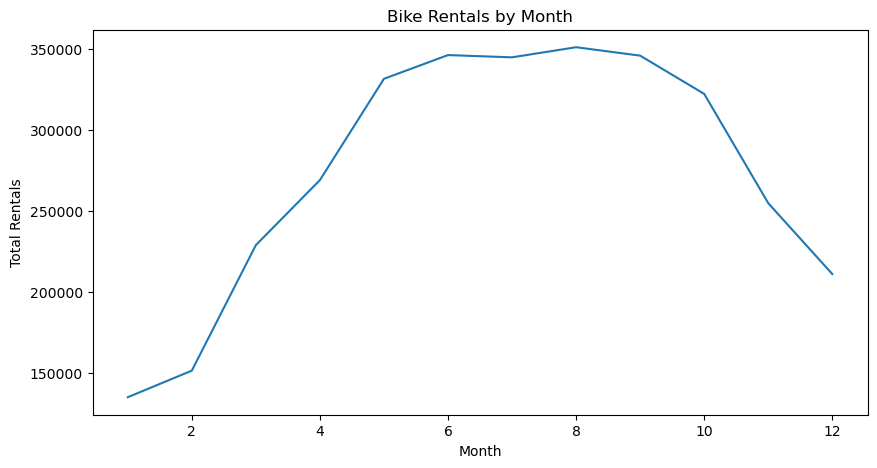

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_data)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

### Weather Impact

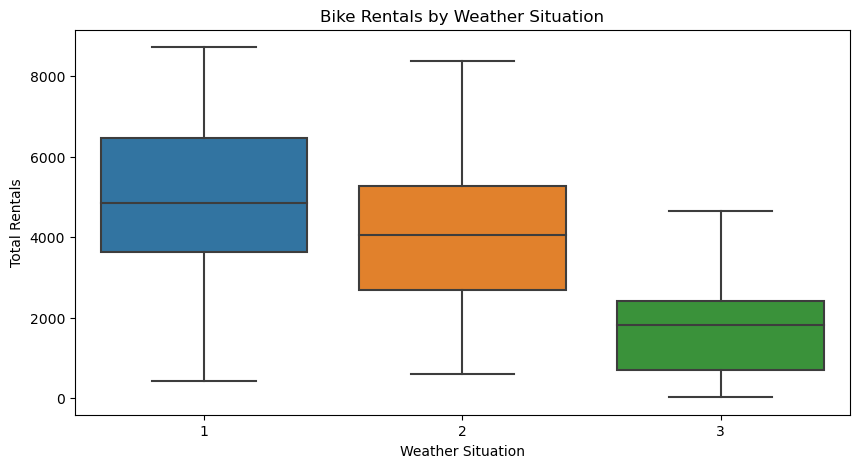

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.title("Bike Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rentals")
plt.show()

### User Behavior

In [20]:
day_df['casual_percentage'] = day_df['casual'] / day_df['cnt']
day_df['registered_percentage'] = day_df['registered'] / day_df['cnt']

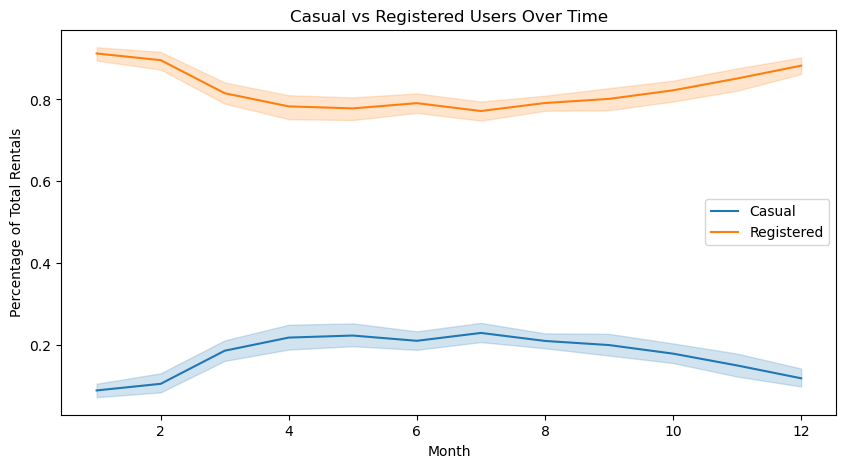

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(data=day_df, x="mnth", y="casual_percentage", label="Casual")
sns.lineplot(data=day_df, x="mnth", y="registered_percentage", label="Registered")
plt.title("Casual vs Registered Users Over Time")
plt.xlabel("Month")
plt.ylabel("Percentage of Total Rentals")
plt.legend()
plt.show()

### Correlation

In [22]:
from scipy.stats import pearsonr

correlation, _ = pearsonr(day_df['temp'], day_df['cnt'])
print('Correlation between temperature and total rentals:', correlation)

Correlation between temperature and total rentals: 0.627494009033492


In [23]:
categorical_df.to_csv("data/categorical_df.csv", index=False)
numerical_data.to_csv("data/numerical_df.csv", index=False)